In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN
from collections import Counter
from google.colab import files

In [37]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [38]:
uploaded = files.upload()
df_1 = pd.read_csv('train.csv')
df = pd.DataFrame(df_1)

Saving train.csv to train (1).csv


In [39]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [40]:
df.age.unique()

array([38.17274623, 47.7505168 ,  7.38037308, 23.56192742, 43.20579044,
       31.5279644 , 28.42797076, 26.48449442, 48.20345856, 24.16794517,
       21.49703144,  9.04422584, 56.00816807, 21.0875973 , 29.14538397,
       31.27199413, 23.73476684, 28.63694334, 14.4049851 , 72.83887066,
       25.06830214, 15.36750123, 41.95517061, 21.05567436, 14.12910836,
       54.49860242, 26.59264047, 26.42977485, 12.84159731,  9.66220855,
       30.50058819, 74.87051104, 26.07964814, 67.00819233, 22.46984114,
       30.94822637, 24.92914563, 24.94160486, 11.88213606, 26.75778566,
       44.32227347, 74.53450864, 23.58363906, 25.64110026, 22.57022313,
       35.73551276, 22.41443272, 30.19192183, 47.59591916,  7.57244956,
       17.34629766, 41.22877555, 18.70249321,  6.9287435 , 41.8240423 ,
       46.08667963, 23.63397697, 48.35947059, 42.6822189 , 21.53439758,
       21.47758213, 35.23448231, 51.91718291, 14.05691123, 13.56674871,
       38.91852862, 16.33264533, 17.52426083, 44.34770684, 37.98

In [41]:
df=df.replace(to_replace="?",value=" ")

In [42]:
#Replacing blanks values wrt to column
#print(df.age.mode())
df['age']=df['age'].replace(to_replace=" ",value="21")
#print(df.ethnicity.value_counts())
df['ethnicity']=df['ethnicity'].replace(to_replace=" ",value='others')
#print(df.relation.value_counts())
df['relation']=df['relation'].replace(to_replace=" ",value='Others')

In [43]:
import pandas as pd
import plotly.express as px

<ipython-input-44-f2d2ebf46037>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Class/ASD', ylabel='count'>

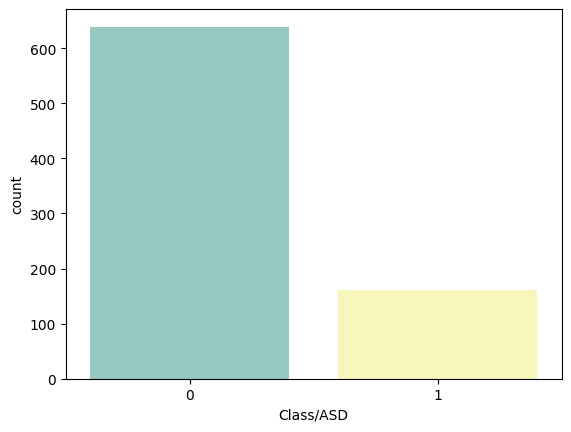

In [44]:
sns.countplot(x='Class/ASD', data=df,palette='Set3')

<ipython-input-45-078d24cf274b>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='austim', ylabel='count'>

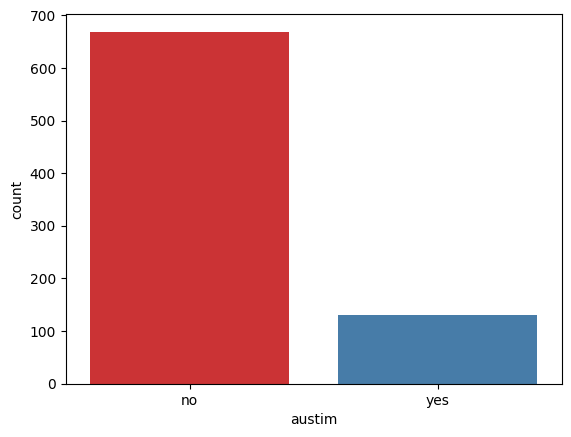

In [45]:
sns.countplot(x='austim', data=df,palette='Set1')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'others'),
  Text(1, 0, 'White-European'),
  Text(2, 0, 'Middle Eastern '),
  Text(3, 0, 'Pasifika'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Others'),
  Text(6, 0, 'Hispanic'),
  Text(7, 0, 'Asian'),
  Text(8, 0, 'Turkish'),
  Text(9, 0, 'South Asian'),
  Text(10, 0, 'Latino')])

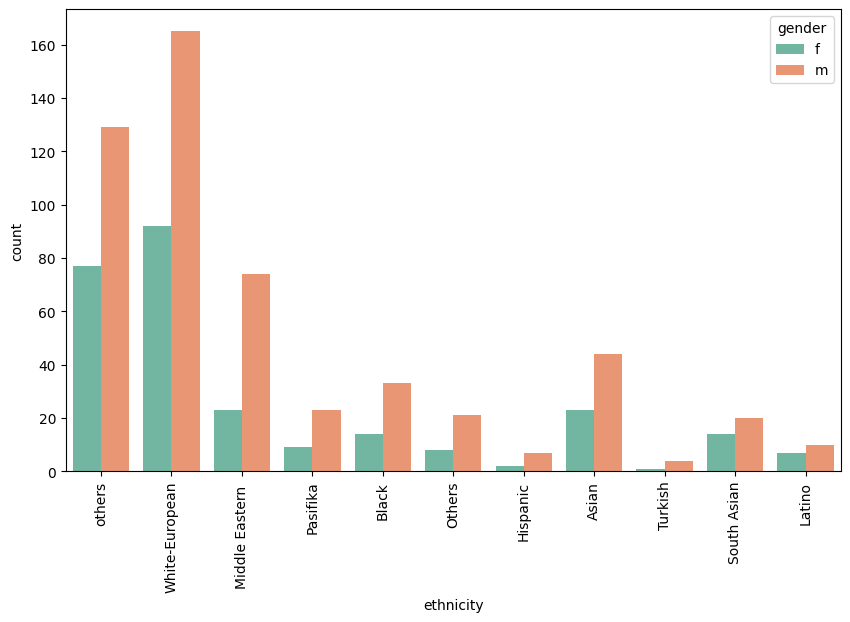

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='ethnicity',hue='gender',data=df,palette='Set2')
plt.xticks(rotation=90)

<ipython-input-47-ed10ca0e4e33>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Figure size 1500x600 with 0 Axes>

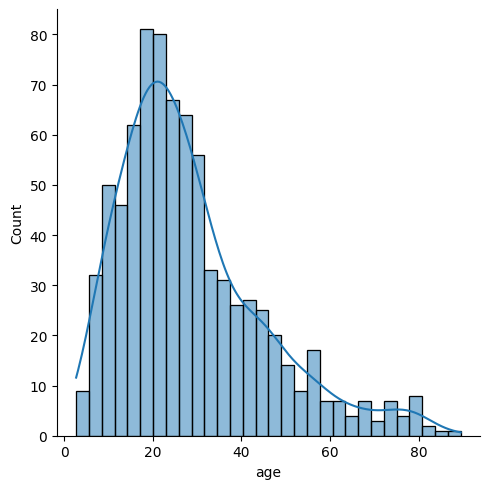

In [47]:
plt.figure(figsize=(15,6))
sns.displot(df["age"],kde=True,bins=30,palette='Red')

In [48]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

Text(0.5, 0, 'Class/ASD')

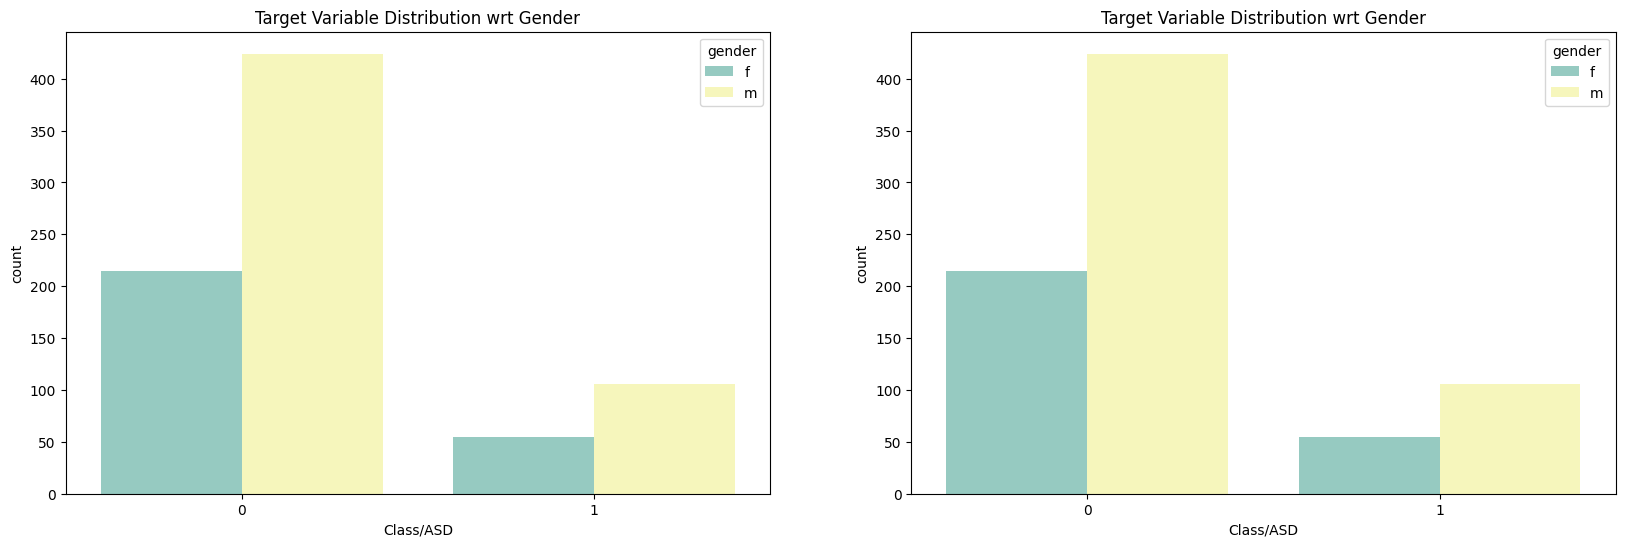

In [49]:
#birth based on gender
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='Class/ASD',data=df,hue='gender',ax=ax[0],palette='Set3')
ax[0].set_title('Target Variable Distribution wrt Gender')
ax[0].set_xlabel('Class/ASD')
sns.countplot(x='Class/ASD',data=df,hue='gender',ax=ax[1],palette='Set3')
ax[1].set_title('Target Variable Distribution wrt Gender')
ax[1].set_xlabel('Class/ASD')

In [50]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,others,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,others,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,others,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,others,no,no,South Africa,no,-4.777286,18 and more,Self,0


<Axes: xlabel='relation', ylabel='count'>

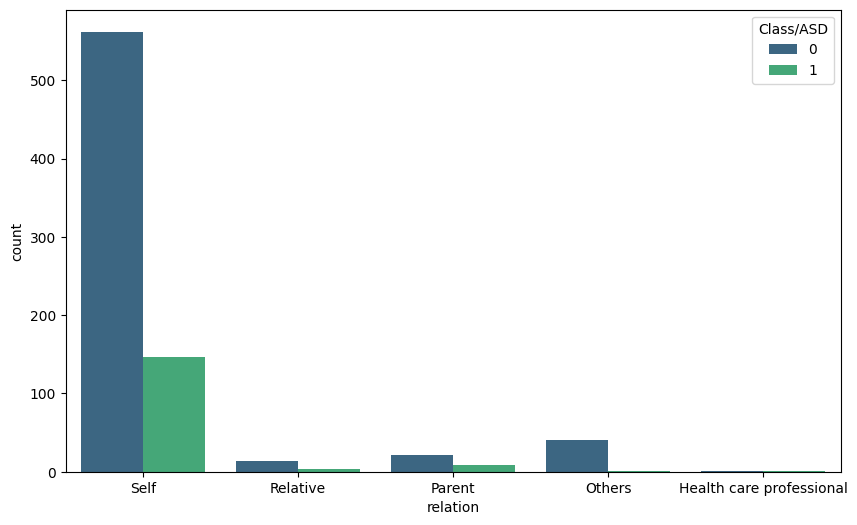

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(x='relation',hue='Class/ASD',data=df,palette='viridis')

<ipython-input-52-523b869d5ffa>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<Figure size 1500x600 with 0 Axes>

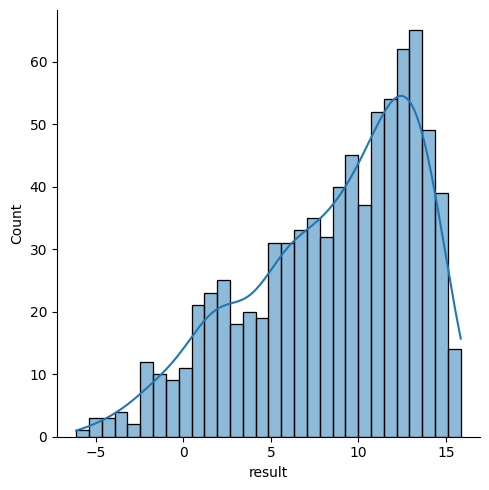

In [52]:
plt.figure(figsize=(15,6))
sns.displot(df["result"],kde=True,bins=30,palette='Red')

In [53]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

<Axes: xlabel='gender', ylabel='count'>

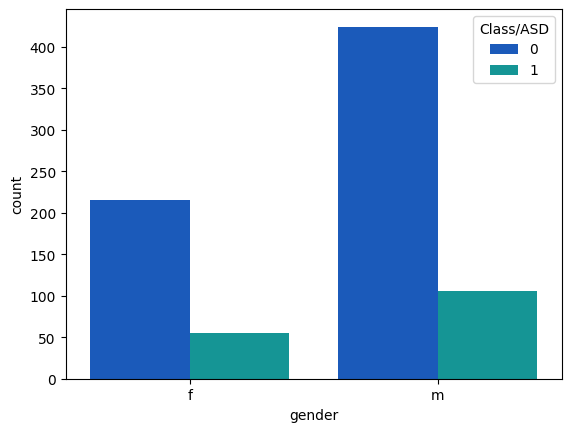

In [54]:
sns.countplot(x='gender',hue='Class/ASD',data=df,palette='winter')

In [55]:
# Create the 'Age_Cat' column if it doesn't exist
if 'Age_Cat' not in df.columns:
    # Assuming you have 'age' column and want to categorize it
    bins = [0,17,25,35,60]
    category = ['Teen','Adult','Senior Adult','Senior Citizen']
    df['Age_Cat'] = pd.cut(df["age"],bins,labels = category)

# Now you can convert it to string type
df.Age_Cat=df.Age_Cat.astype(str)

In [56]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
df[numerical_features].head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,6.351166,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,2.255185,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,14.851484,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,2.276617,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,-4.777286,0


In [57]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['id']]

In [58]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [59]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is gender and number of categories are 2
The feature is ethnicity and number of categories are 11
The feature is jaundice and number of categories are 2
The feature is austim and number of categories are 2
The feature is contry_of_res and number of categories are 56
The feature is used_app_before and number of categories are 2
The feature is age_desc and number of categories are 1
The feature is relation and number of categories are 5
The feature is Age_Cat and number of categories are 5


In [60]:
#Feature Engineering

In [61]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD',
       'Age_Cat'],
      dtype='object')

In [62]:
df.age.describe()

,age
count,800.000000
mean,28.452118
std,16.310966
min,2.718550
25%,17.198153
50%,24.848350
75%,35.865429
max,89.461718


In [63]:
df.ethnicity.value_counts()
#replace others and Others
#bucket age column
#remove age_desc column

,count
ethnicity,
White-European,257
others,206
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [64]:
df.relation.value_counts()

,count
relation,
Self,709
Others,42
Parent,29
Relative,18
Health care professional,2


In [65]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [66]:
import pandas as pd
import plotly.express as px

labels=df['Class/ASD']
target=df['Class/ASD'].value_counts()
value=(df['Class/ASD'].value_counts())/len(df['Class/ASD'])*100
class_num=len(target)

# Now you can create the pie chart
fig = px.pie(target, values=value, names=target.index, hole=0.4, width=500, height=500) #4
fig.update_traces(textinfo='value+label', pull=0.01)
fig.show()

# From above pie chart we can deduce that data is imbalanced so workflow will be as follows:
1. Feature Engineering (if needed)
2. Feature Encoding
3. Tackle Class Imbalance data
4. Scaling data
5. Training Model
6. Evaluating Model

In [67]:
df.ethnicity.value_counts()
#replace others and Others
#bucket age column
#remove age_desc column

,count
ethnicity,
White-European,257
others,206
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [68]:
df['ethnicity']=df['ethnicity'].replace(to_replace="others",value="Others")

In [69]:
bins = [0,17,25,35,60]
category = ['Teen','Adult','Senior Adult','Senior Citizen']
df['Age_Cat'] = pd.cut(df["age"],bins,labels = category)

In [70]:
df['age']=df['age'].astype('int')

In [71]:
df['Age_Cat'] = df['Age_Cat'].value_counts()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int64  
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [73]:
df.drop(df.columns[[11,19]], axis=1, inplace=True)

In [74]:
df['Class/ASD'].replace(['NO', 'YES'],[0, 1], inplace=True)

<ipython-input-74-84aba68894bb>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [75]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['Class/ASD'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [76]:
df.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD,Age_Cat
0,1,1,0,1,0,1,0,1,0,1,1,1,1,0,0,26,0,6.351166,1,0,NaN
1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,24,0,2.255185,1,0,NaN
2,3,1,1,1,1,1,1,1,1,1,1,0,9,0,1,53,0,14.851484,1,1,NaN
3,4,0,0,0,0,0,0,0,0,0,0,1,1,0,0,53,0,2.276617,1,0,NaN
4,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,20,0,-4.777286,1,0,NaN
5,6,1,0,0,0,0,1,0,0,1,1,0,3,0,0,25,0,9.562117,1,0,NaN
6,7,1,0,0,0,0,0,1,1,1,0,1,6,0,0,47,0,7.984569,1,0,NaN
7,8,1,1,1,1,1,1,1,0,1,1,0,5,0,1,53,0,13.237898,1,1,NaN
8,9,1,1,1,1,0,0,0,1,1,1,0,9,0,0,28,0,-1.755774,1,0,NaN
9,10,0,0,0,0,0,0,0,1,0,1,1,1,1,0,23,0,14.922570,1,0,NaN


In [77]:
X=df.drop(['Class/ASD'],axis=1)
y=df['Class/ASD']

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=21,stratify=y)

In [79]:
scaling_feature=[feature for feature in X_train.columns]
len(scaling_feature)

20

In [80]:
feature_scale = [feature for feature in X_train.columns if feature != 'Age_Cat']
scaler = MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler()

In [81]:
X_train_scaled=scaler.transform(X_train[feature_scale])
X_test_scaled=scaler.transform(X_test[feature_scale])

In [82]:
smote=SMOTEENN()

In [83]:
smote_X_train,smote_y_train=smote.fit_resample(X_train_scaled,y_train)

In [84]:
print('Original Dataset Shape',Counter(y_train))
print('After SMOTE Dataset Shape',Counter(smote_y_train))

Original Dataset Shape Counter({0: 511, 1: 129})
After SMOTE Dataset Shape Counter({1: 443, 0: 376})


In [85]:
rf_1=RandomForestClassifier()
rf_1.fit(smote_X_train,smote_y_train)

RandomForestClassifier()

In [86]:
X_test

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Age_Cat
148,149,1,1,1,1,1,0,1,1,1,1,0,9,1,0,28,0,14.854236,2,NaN
502,503,0,1,0,0,0,0,1,0,0,0,0,1,0,0,28,0,1.794819,1,NaN
768,769,1,1,1,1,1,1,1,0,1,1,0,9,1,0,29,0,12.297944,1,NaN
193,194,1,0,1,1,1,1,1,1,1,1,1,9,1,0,25,0,12.798724,1,NaN
623,624,1,1,0,0,0,0,0,1,1,0,0,3,0,0,22,0,3.662435,1,NaN
562,563,1,1,1,0,1,1,1,0,1,1,1,9,0,1,53,0,8.040649,1,NaN
738,739,1,1,1,1,0,0,0,1,1,0,1,1,0,0,31,0,9.000475,1,NaN
80,81,0,1,0,0,0,0,0,0,0,1,1,3,0,0,24,0,1.832433,1,NaN
627,628,1,0,0,1,0,0,0,0,0,0,1,2,0,0,17,0,8.340745,0,NaN
761,762,1,1,1,1,1,1,1,1,1,1,0,9,0,0,53,0,11.921849,1,NaN


In [87]:
pred=rf_1.predict(X_test_scaled)

In [88]:
pred=rf_1.predict(X_test_scaled)
print('Train Score: {} '.format(rf_1.score(smote_X_train,smote_y_train)))
print('Test Score :{} '.format(rf_1.score(X_test_scaled,y_test)))

Train Score: 1.0 
Test Score :0.85 


In [89]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       114
           1       0.84      0.59      0.69        46

    accuracy                           0.85       160
   macro avg       0.85      0.77      0.80       160
weighted avg       0.85      0.85      0.84       160



In [90]:
cf_matrix=confusion_matrix(y_test,pred)
print(cf_matrix)

[[109  19]
 [  5  27]]


<Axes: >

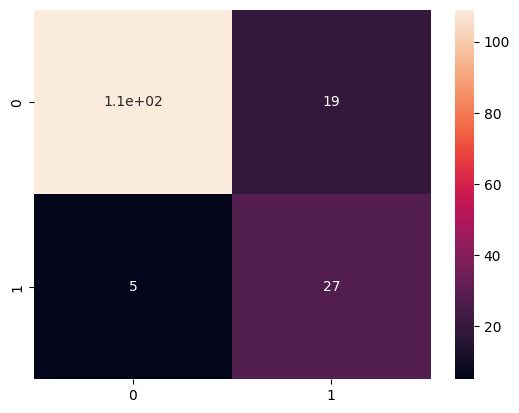

In [91]:
cf_matrix=confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix, annot=True)

<Axes: >

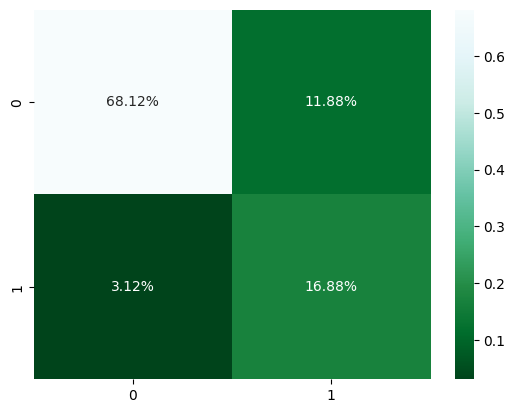

In [92]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='BuGn_r')

In [93]:
y_score=rf_1.predict_proba(X_test_scaled)
y_pred=rf_1.predict(X_test_scaled)

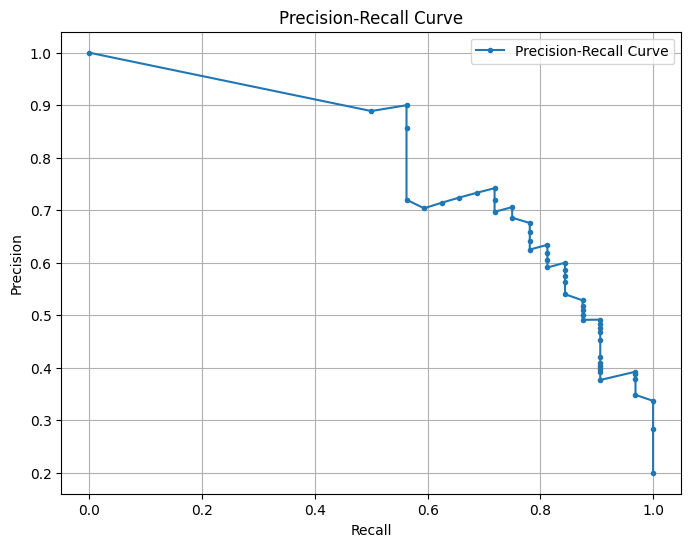

In [94]:
def plot_precision_recall(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_precision_recall(y_test, y_score)
plt.show()

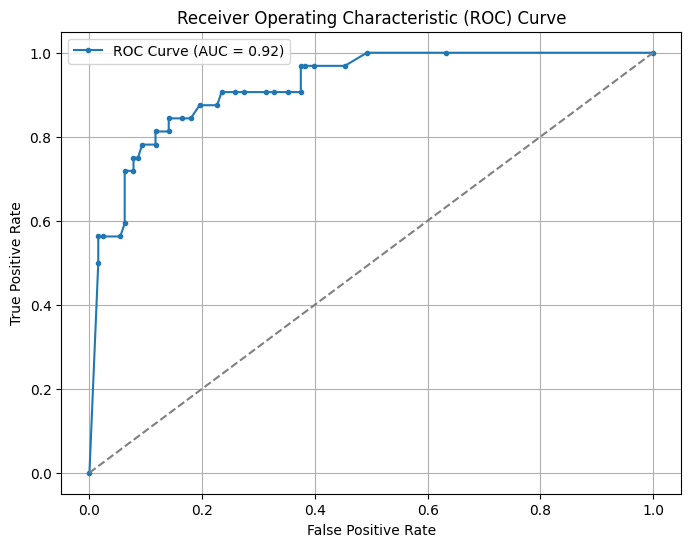

In [95]:
y_score = rf_1.predict_proba(X_test_scaled)
y_pred = rf_1.predict(X_test_scaled)

def plot_roc(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='.', label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.grid()
    plt.show()

plot_roc(y_test, y_score[:, 1]) # Call plot_roc after it's been defined

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

Text(0.5, 0, 'Random Forest Cllassifier Feature Importance')

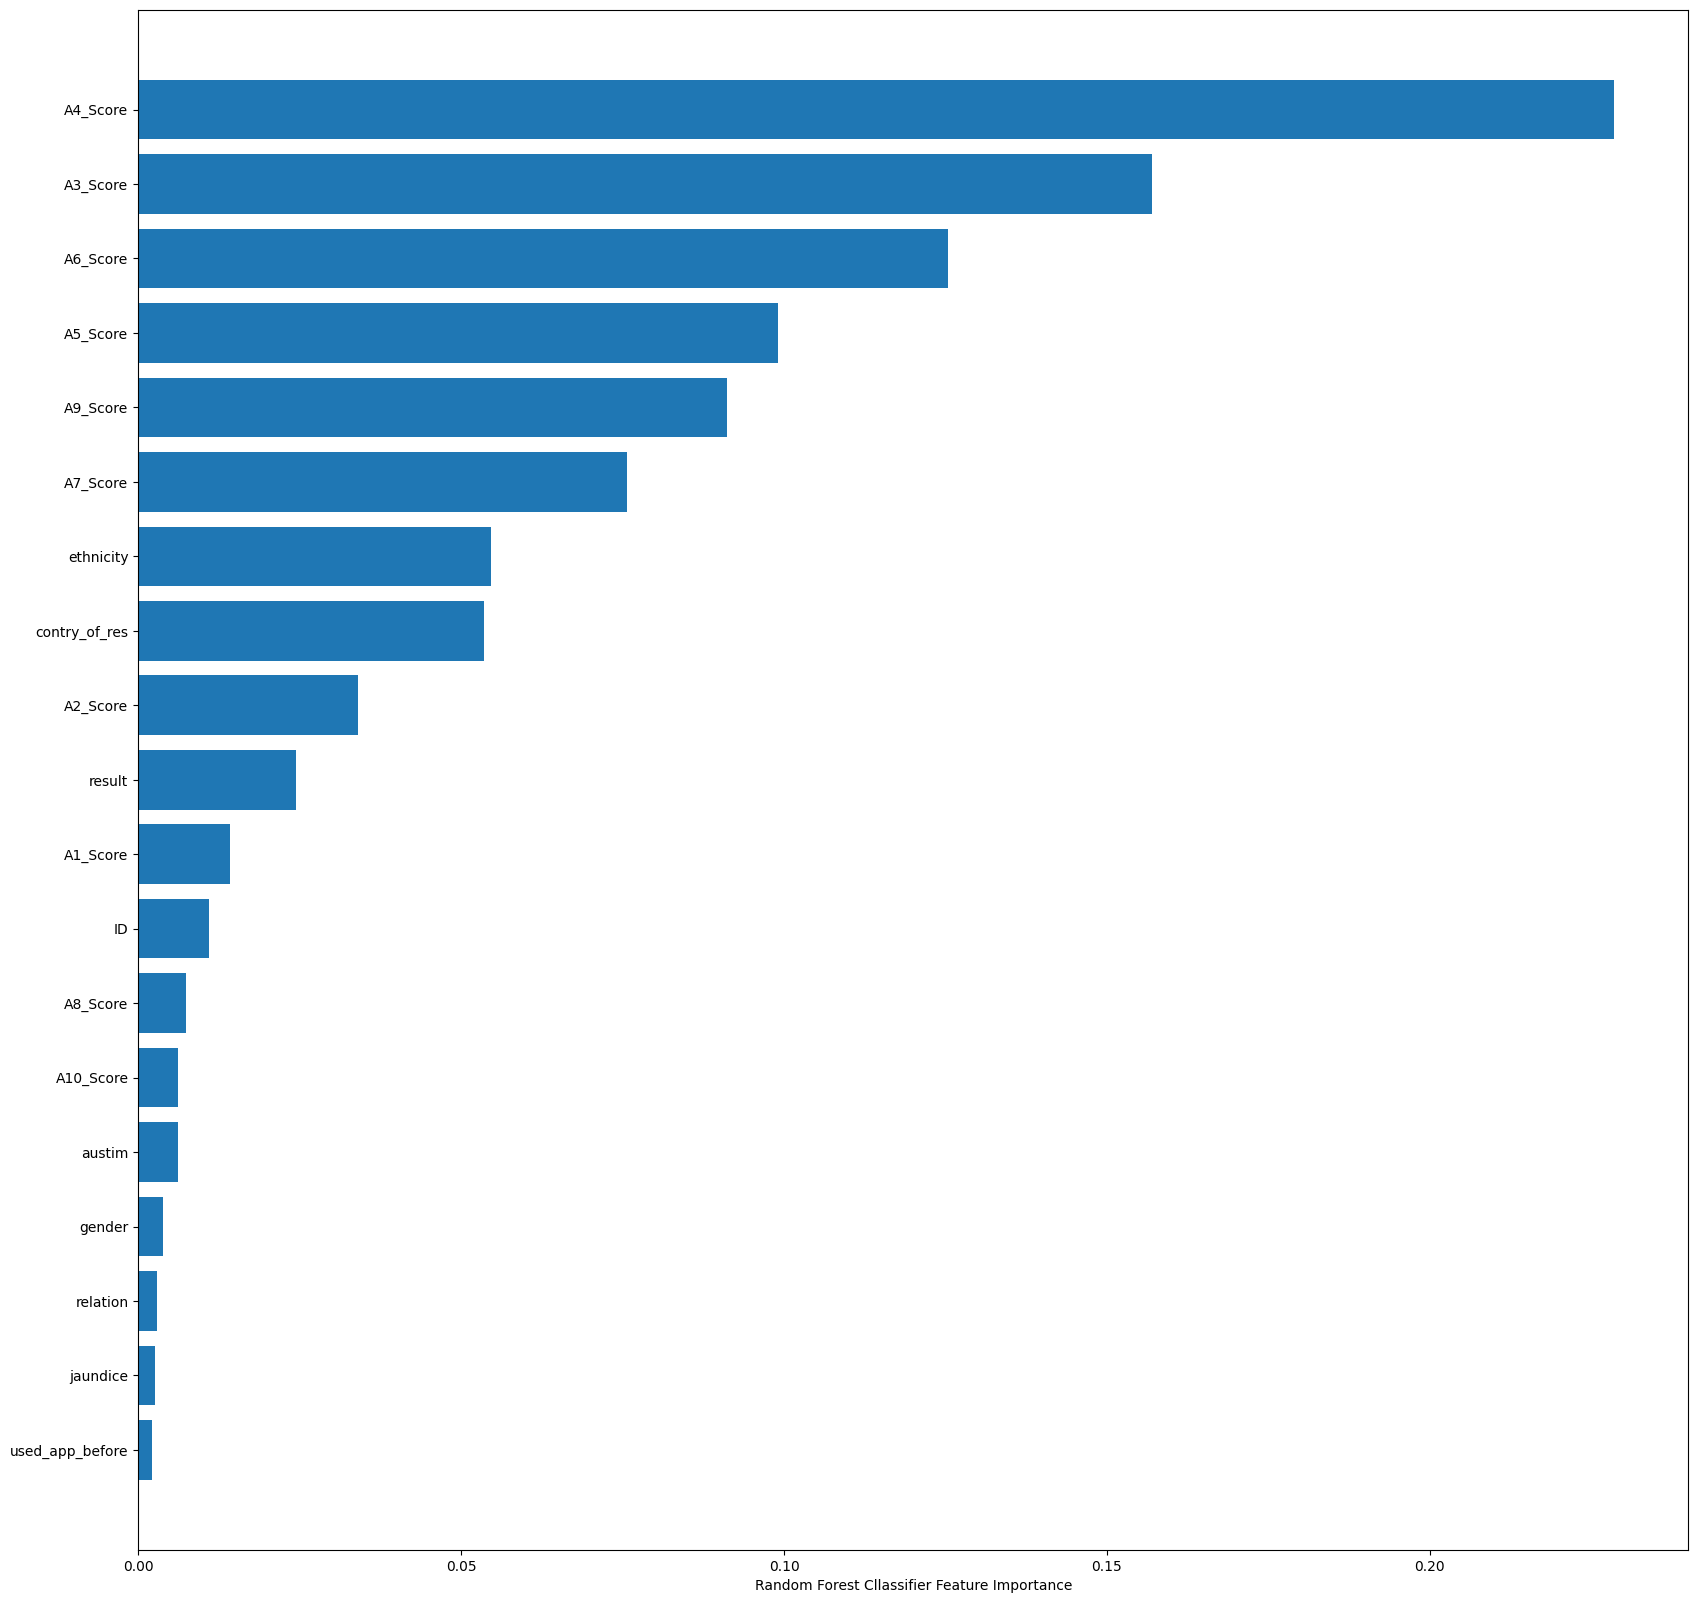

In [97]:
feature_names=X_train.columns
plt.figure(figsize=(20,20))
rf_1.feature_importances_
sorted_idx=rf_1.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx],rf_1.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Cllassifier Feature Importance')